In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Correlation techniques for the classification problems**

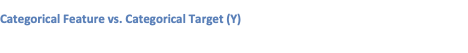

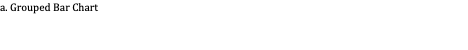

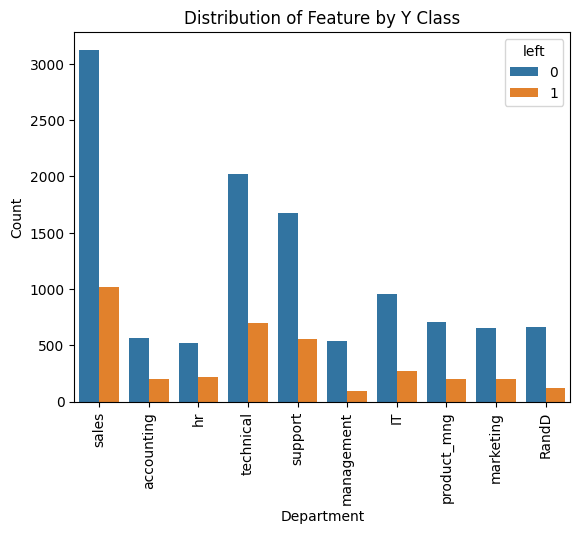

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Department', hue='left')
plt.xticks(rotation=90)

# Set title and y-axis label with vertical text
plt.title('Distribution of Feature by Y Class')
plt.ylabel('Count')
plt.xlabel('Department')
plt.show()

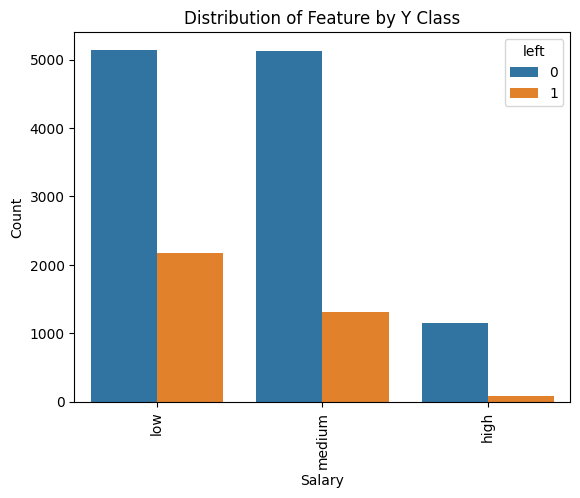

In [12]:
sns.countplot(data=df, x='salary', hue='left')
plt.xticks(rotation=90)

# Set title and y-axis label with vertical text
plt.title('Distribution of Feature by Y Class')
plt.ylabel('Count')
plt.xlabel('Salary')
plt.show()

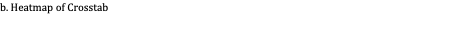

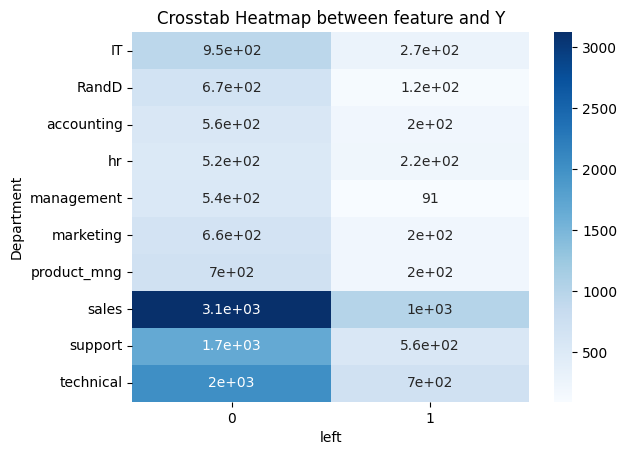

In [14]:
cross_tab = pd.crosstab(df['Department'], df['left'])
sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.title('Crosstab Heatmap between feature and Y')
plt.show()

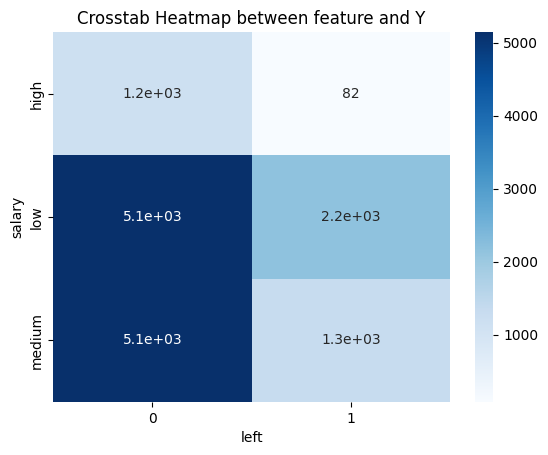

In [16]:
cross_tab = pd.crosstab(df['salary'], df['left'])
sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.title('Crosstab Heatmap between feature and Y')
plt.show()

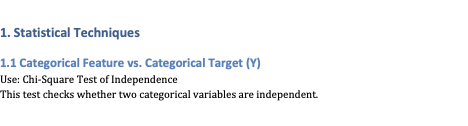

In [17]:
from scipy.stats import chi2_contingency
import pandas as pd

contingency_table = pd.crosstab(df['salary'], df['left'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 381.22504706621066
p-value: 1.652086749295958e-83


In [18]:
contingency_table = pd.crosstab(df['Department'], df['left'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 86.82547426790299
p-value: 7.042130463822518e-15


Explanation of the Output:
Chi-Square Statistic for salary vs left:

Chi-square statistic: 381.23

p-value: 1.65e-83 (a very small value)

Conclusion: Since the p-value is very small (much less than 0.05), we can reject the null hypothesis. This indicates a significant association between salary and whether an employee left the company. In other words, employees with different salary levels are more likely to either leave or stay.

Chi-Square Statistic for Department vs left:

Chi-square statistic: 86.83

p-value: 7.04e-15 (a very small value)

Conclusion: Similar to the first test, the p-value is very small (much less than 0.05), meaning we reject the null hypothesis here as well. There is a significant association between the department and whether an employee left the company.

**Small p-value (typically < 0.05):**

If the p-value is small, we reject the null hypothesis and conclude that there is a significant relationship between the feature and the target variable.

In this case, do not drop the feature; it is important and should be kept for the model.

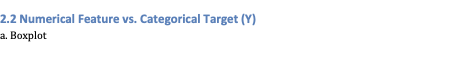

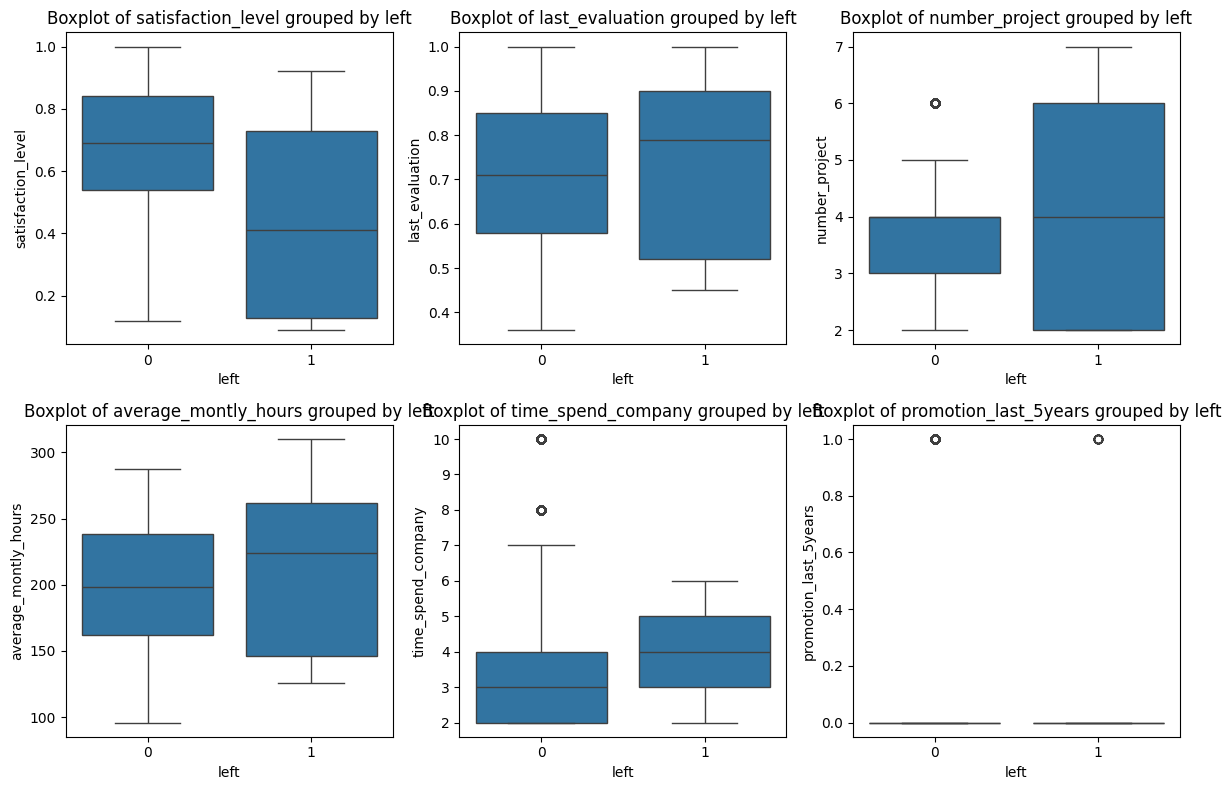

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

def boxplot_multiple_numerical_features(df, numerical_features, categorical_target):
    plt.figure(figsize=(12, 8))

    for i, feature in enumerate(numerical_features):
        plt.subplot(2, 3, i + 1)  # Adjust the grid size based on the number of features
        sns.boxplot(data=df, x=categorical_target, y=feature)
        plt.title(f'Boxplot of {feature} grouped by {categorical_target}')

    plt.tight_layout()
    plt.show()

# List of numerical features to plot
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company',
       'promotion_last_5years']

# Example usage: Generate boxplots for these numerical features against the target 'left'
boxplot_multiple_numerical_features(df, numerical_features, 'left')


In [20]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [25]:
df_num = df.drop(['salary', 'Department'], axis='columns')

df_num.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
